In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import pickle
import numpy as np

mpl.rcParams['font.serif'] = "Times New Roman"
mpl.rcParams['figure.figsize'] = [3.25,3.25]
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rc('text', usetex='true') 
mpl.rc('font', family='serif') 

plt.rcParams.update({'font.size': 8, 'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'})

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.titlesize'] = 18

In [2]:
with open('plot1_LS.p', 'rb') as f:
    a1_LS, a2_LS, a3_LS = pickle.load(f)
with open('plot2_LS.p', 'rb') as f:
    x1_LS, s1_LS, r1_LS = pickle.load(f)
with open('plot3_LS.p', 'rb') as f:
    b1_LS, b2_LS, b3_LS = pickle.load(f)
with open('plot4_LS.p', 'rb') as f:
    x2_LS, s2_LS, r2_LS = pickle.load(f)

In [3]:
def NinetyFive_CI(data):
    a = 1.0 * np.array(data)
    m = np.mean(a)
    h = 2*np.std(a)
    return m-h, m, m+h

In [4]:
T = a1_LS.shape[0] - 1

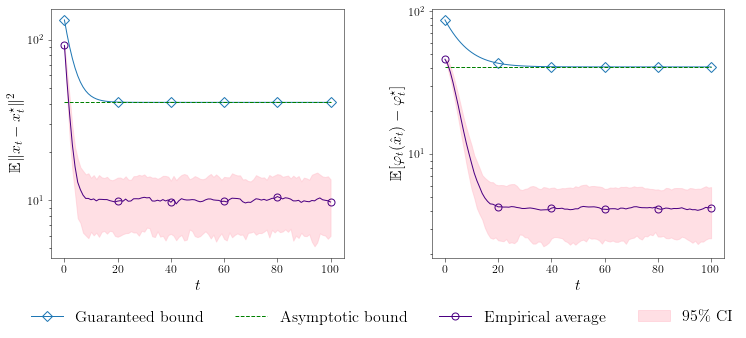

In [5]:
# set up plot area
f, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['axes.titlesize'] = 16

ax = axes[0]

# 95% confidence interval data
m0 = [NinetyFive_CI(a1_LS[k]) for k in range(a1_LS.shape[0])]
m = np.stack(m0, axis=0)

# Plot a1_LS (with 95% confidence interval), a2_LS, a3_LS
ax.plot(a3_LS, label='Guaranteed bound', color='tab:blue', linestyle='-', marker='D', markerfacecolor='none', markevery=int((T+1)/5))
ax.plot(a2_LS*np.ones(T+1), label='Asymptotic bound', color='green', linestyle='--')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=int((T+1)/5), label='Empirical average')
ax.fill_between(np.arange(0,T+1), m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$ \mathbb{E} \|x_t - x_t^\star\|^2$')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e3)

ax = axes[1]

# 95% confidence interval data
m0 = [NinetyFive_CI(b1_LS[k]) for k in range(b1_LS.shape[0])]
m = np.stack(m0, axis=0)

# Plot b1_LS (with 95% confidence interval), b2_LS, b3_LS
ax.plot(b3_LS, label='Guaranteed bound', color='tab:blue', linestyle='-', marker='D', markerfacecolor='none', markevery=int((T+1)/5))
ax.plot(b2_LS*np.ones(T+1), label='Asymptotic bound', color='green', linestyle='--')
fillcolor = 'pink'
linecolor = 'indigo'
ax.plot(m[:,1], color=linecolor, marker = 'o', markerfacecolor='none', markevery=int((T+1)/5), label='Empirical average')
ax.fill_between(np.arange(0,T+1), m[:,0], m[:,2], alpha=0.5,edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
ax.tick_params(width=.5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\mathbb{E}[\varphi_t(\hat{x}_t) - \varphi_t^\star]$')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e3)

# set up legend
leg = axes[0].legend(loc = 'upper center', frameon=False, bbox_to_anchor=(1.13, -.15),ncol=4)
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth(0.5)
leg.get_frame().set_boxstyle('Square', pad=0)

plt.savefig('Fig_LS1.pdf', bbox_inches='tight')

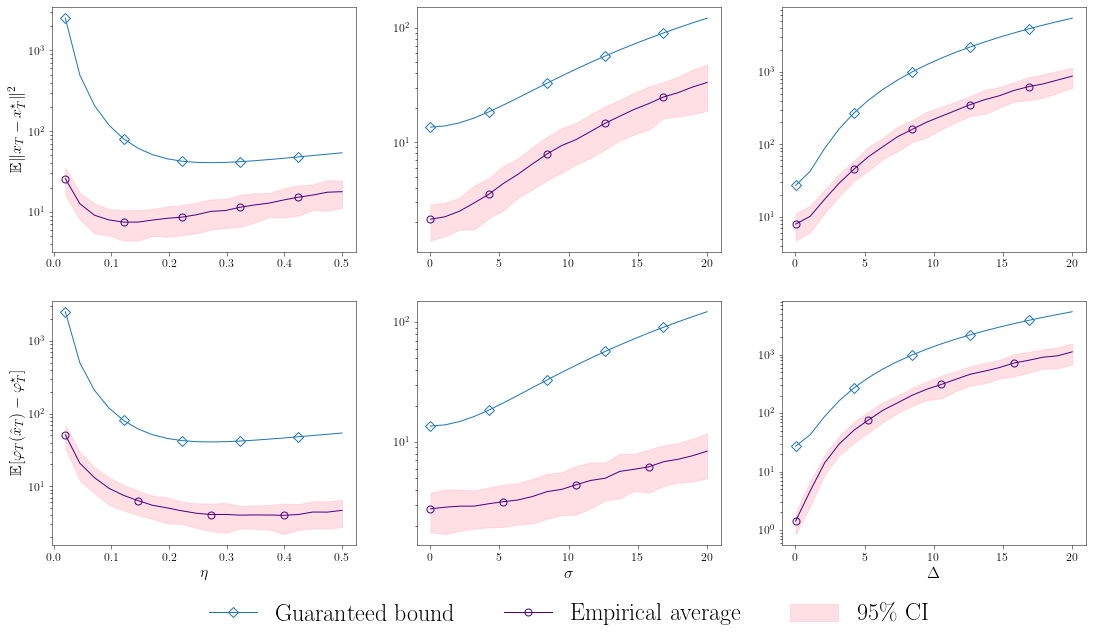

In [6]:
# set up plot area
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
fig.tight_layout(pad=1)
fillcolor = 'pink'
linecolor = 'indigo'
xlabels = [r'$\eta$',r'$\sigma$',r'$\Delta$']
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['axes.titlesize'] = 22

# plot each column 
for j in range(3):
    m1 = [NinetyFive_CI(s1_LS[j][k]) for k in range(s1_LS[j].shape[0])]
    m1_j = np.stack(m1, axis=0)
    m2 = [NinetyFive_CI(s2_LS[j][k]) for k in range(s2_LS[j].shape[0])]
    m2_j = np.stack(m2, axis=0)
    
    # semi-log plot experiment with predicted bound
 
    axes[0,j].plot(x1_LS[j], r1_LS[j], color='tab:blue', marker='D', markerfacecolor='none', markevery=4, label = 'Guaranteed bound')
    axes[0,j].plot(x1_LS[j], m1_j[:,1], color=linecolor, marker='o', markerfacecolor='none', markevery=4, label = 'Empirical average')
    axes[0,j].fill_between(x1_LS[j], m1_j[:,0], m1_j[:,2], alpha=0.5, edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
    
    axes[0,j].tick_params(width=.5)
    axes[0,j].set_yscale('log')
    plt.sca(axes[0,j])
#     plt.ylim(1e-1,1e5)
    
    axes[1,j].plot(x2_LS[j], r2_LS[j], color='tab:blue', marker='D', markerfacecolor='none', markevery=4, label = 'Guaranteed bound')
    axes[1,j].plot(x2_LS[j], m2_j[:,1], color=linecolor, marker='o', markerfacecolor='none', markevery=5, label =  'Empirical average')
    axes[1,j].fill_between(x2_LS[j], m2_j[:,0], m2_j[:,2], alpha=0.5, edgecolor=fillcolor, facecolor=fillcolor, label = '95\% CI')
    
    axes[1,j].tick_params(width=.5)
    axes[1,j].set_xlabel(xlabels[j])
    axes[1,j].set_yscale('log')
    plt.sca(axes[1,j])
#     plt.ylim(1e-1,1e5)


axes[0,0].set_ylabel(r'$\mathbb{E}\|x_T - x_T^\star\|^2$')
axes[1,0].set_ylabel(r'$\mathbb{E}[\varphi_T(\hat{x}_T) - \varphi_T^\star]$')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
leg = axes[1,1].legend(loc = 'upper center', frameon=False, bbox_to_anchor=(0.5, -.15), ncol=3)
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth(0.5)
leg.get_frame().set_boxstyle('Square', pad=0)                       
                       
plt.savefig('Fig_LS2.pdf', bbox_inches='tight')